In [1]:
# jupyter lab에서 자동완성이 않될때 사용하는 코드
%config Completer.use_jedi = False

In [81]:
import os
import torch
from torch.utils.data import Dataset
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [88]:
class KneeDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        
        lst_all_data = os.listdir(self.path)
                
        lst_data = []
        lst_mask = []
        
        for data in lst_all_data:
            if 'mask' in data:
                lst_mask.append(data)
            else:
                lst_data.append(data)
                
        lst_data.sort()
        lst_mask.sort()
        
        self.lst_data = lst_data
        self.lst_mask = lst_mask
        
    def __len__(self):
        return len(self.lst_data)
    
    def __getitem__(self, idx):
        image_path = os.path.join(self.path, self.lst_data[idx])
        mask_path = os.path.join(self.path, self.lst_mask[idx])
        
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = img / 255.0
        
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = mask / 255.0
        
        if img.ndim == 2:
            img = img[:, :, np.newaxis]
        if mask.ndim == 2:
            mask = mask[:, :, np.newaxis]
            
        if self.transform:
            img = self.transform(img)
        
        return img, mask

### dataset test

In [89]:
dataset = KneeDataset('./data/train/')

(250, 281, 1) (250, 281, 1)


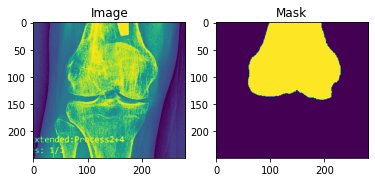

In [98]:
i = 9

img, mask = dataset[i]
print(img.shape, mask.shape)

plt.subplot(121)
plt.title('Image')
plt.imshow(img)

plt.subplot(122)
plt.title('Mask')
plt.imshow(mask)

plt.show()